In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
dati=pd.read_csv("./MonthElb_012010_004028900.csv",header=None,names=["DATA","ORA",
                                                                      "ID_RETE_MONIT","CODICE_ISTAT_COMUNE",
                                                                      "PROGR_PUNTO_COM","VELV",
                                                                     "DIRV","DEVST","BARO",
                                                                     "TERMA","IGRO",
                                                                     "RADD","RADR",
                                                                      "PLUV"], na_values="9999.9")
dati.head()#mi mostra la testa dei dati

,DATA,ORA,ID_RETE_MONIT,CODICE_ISTAT_COMUNE,PROGR_PUNTO_COM,VELV,DIRV,DEVST,BARO,TERMA,IGRO,RADD,RADR,PLUV
0,01-01-2010,00:00,17,4028,900,0.4,175.7,NaN,925.7,1.3,84.0,NaN,NaN,0.0
1,01-01-2010,01:00,17,4028,900,0.0,NaN,NaN,925.1,1.3,84.0,NaN,NaN,0.0
2,01-01-2010,02:00,17,4028,900,0.6,197.0,NaN,924.6,1.4,84.0,NaN,NaN,0.0
3,01-01-2010,03:00,17,4028,900,0.9,187.1,NaN,923.8,1.7,84.0,NaN,NaN,0.0
4,01-01-2010,04:00,17,4028,900,1.1,190.7,NaN,923.4,2.2,82.0,NaN,NaN,0.0


In [3]:
pd.read_csv?

PIOGGIA, UMIDITà, DATA-> attenzione
mettiano data ora giorno ecc come colonne separate, poi le uso come features

bassa pressione-> maltempo

In [4]:
dati1=dati[["BARO","TERMA","IGRO","PLUV"]].copy()
dati1.dropna(inplace=True)

In [5]:
X1=dati1[["BARO","TERMA","IGRO"]].values
y=dati1["PLUV"].values


In [6]:
regressione1=LinearRegression()
regressione1.fit(X1,y)
print(f"R^2 vale {regressione1.score(X1,y):.2f}")

R^2 vale 0.04


In [7]:
data=dati["DATA"]

data

0       01-01-2010
1       01-01-2010
2       01-01-2010
3       01-01-2010
4       01-01-2010
           ...    
8755    31-12-2010
8756    31-12-2010
8757    31-12-2010
8758    31-12-2010
8759    31-12-2010
Name: DATA, Length: 8760, dtype: object

In [86]:
dati["GIORNO"]=[int(str(giorno).split("-")[0][:2]) for giorno in data]
dati["MESE"]=[int(str(mese).split("-")[1]) for mese in data]
dati["ORE"]=[int(str(ora).split(":")[0]) for ora in dati["ORA"]]

In [87]:
dati

,DATA,ORA,ID_RETE_MONIT,CODICE_ISTAT_COMUNE,PROGR_PUNTO_COM,VELV,DIRV,DEVST,BARO,TERMA,IGRO,RADD,RADR,PLUV,GIORNO,MESE,ORE
0,01-01-2010,00:00,17,4028,900,0.4,175.7,NaN,925.7,1.3,84.0,NaN,NaN,0.0,1,1,0
1,01-01-2010,01:00,17,4028,900,0.0,NaN,NaN,925.1,1.3,84.0,NaN,NaN,0.0,1,1,1
2,01-01-2010,02:00,17,4028,900,0.6,197.0,NaN,924.6,1.4,84.0,NaN,NaN,0.0,1,1,2
3,01-01-2010,03:00,17,4028,900,0.9,187.1,NaN,923.8,1.7,84.0,NaN,NaN,0.0,1,1,3
4,01-01-2010,04:00,17,4028,900,1.1,190.7,NaN,923.4,2.2,82.0,NaN,NaN,0.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2010,19:00,17,4028,900,1.0,177.2,NaN,952.6,-3.5,99.0,NaN,NaN,0.0,31,12,19
8756,31-12-2010,20:00,17,4028,900,1.3,190.5,NaN,952.3,-3.7,100.0,NaN,NaN,0.0,31,12,20
8757,31-12-2010,21:00,17,4028,900,1.3,182.1,NaN,952.8,-3.9,100.0,NaN,NaN,0.0,31,12,21
8758,31-12-2010,22:00,17,4028,900,1.3,186.4,NaN,953.0,-4.5,100.0,NaN,NaN,0.0,31,12,22


In [91]:
dati1=dati[["VELV","DIRV","BARO","TERMA","IGRO","PLUV","GIORNO","MESE","ORE"]].copy()

In [92]:
dati1.dropna(inplace=True)

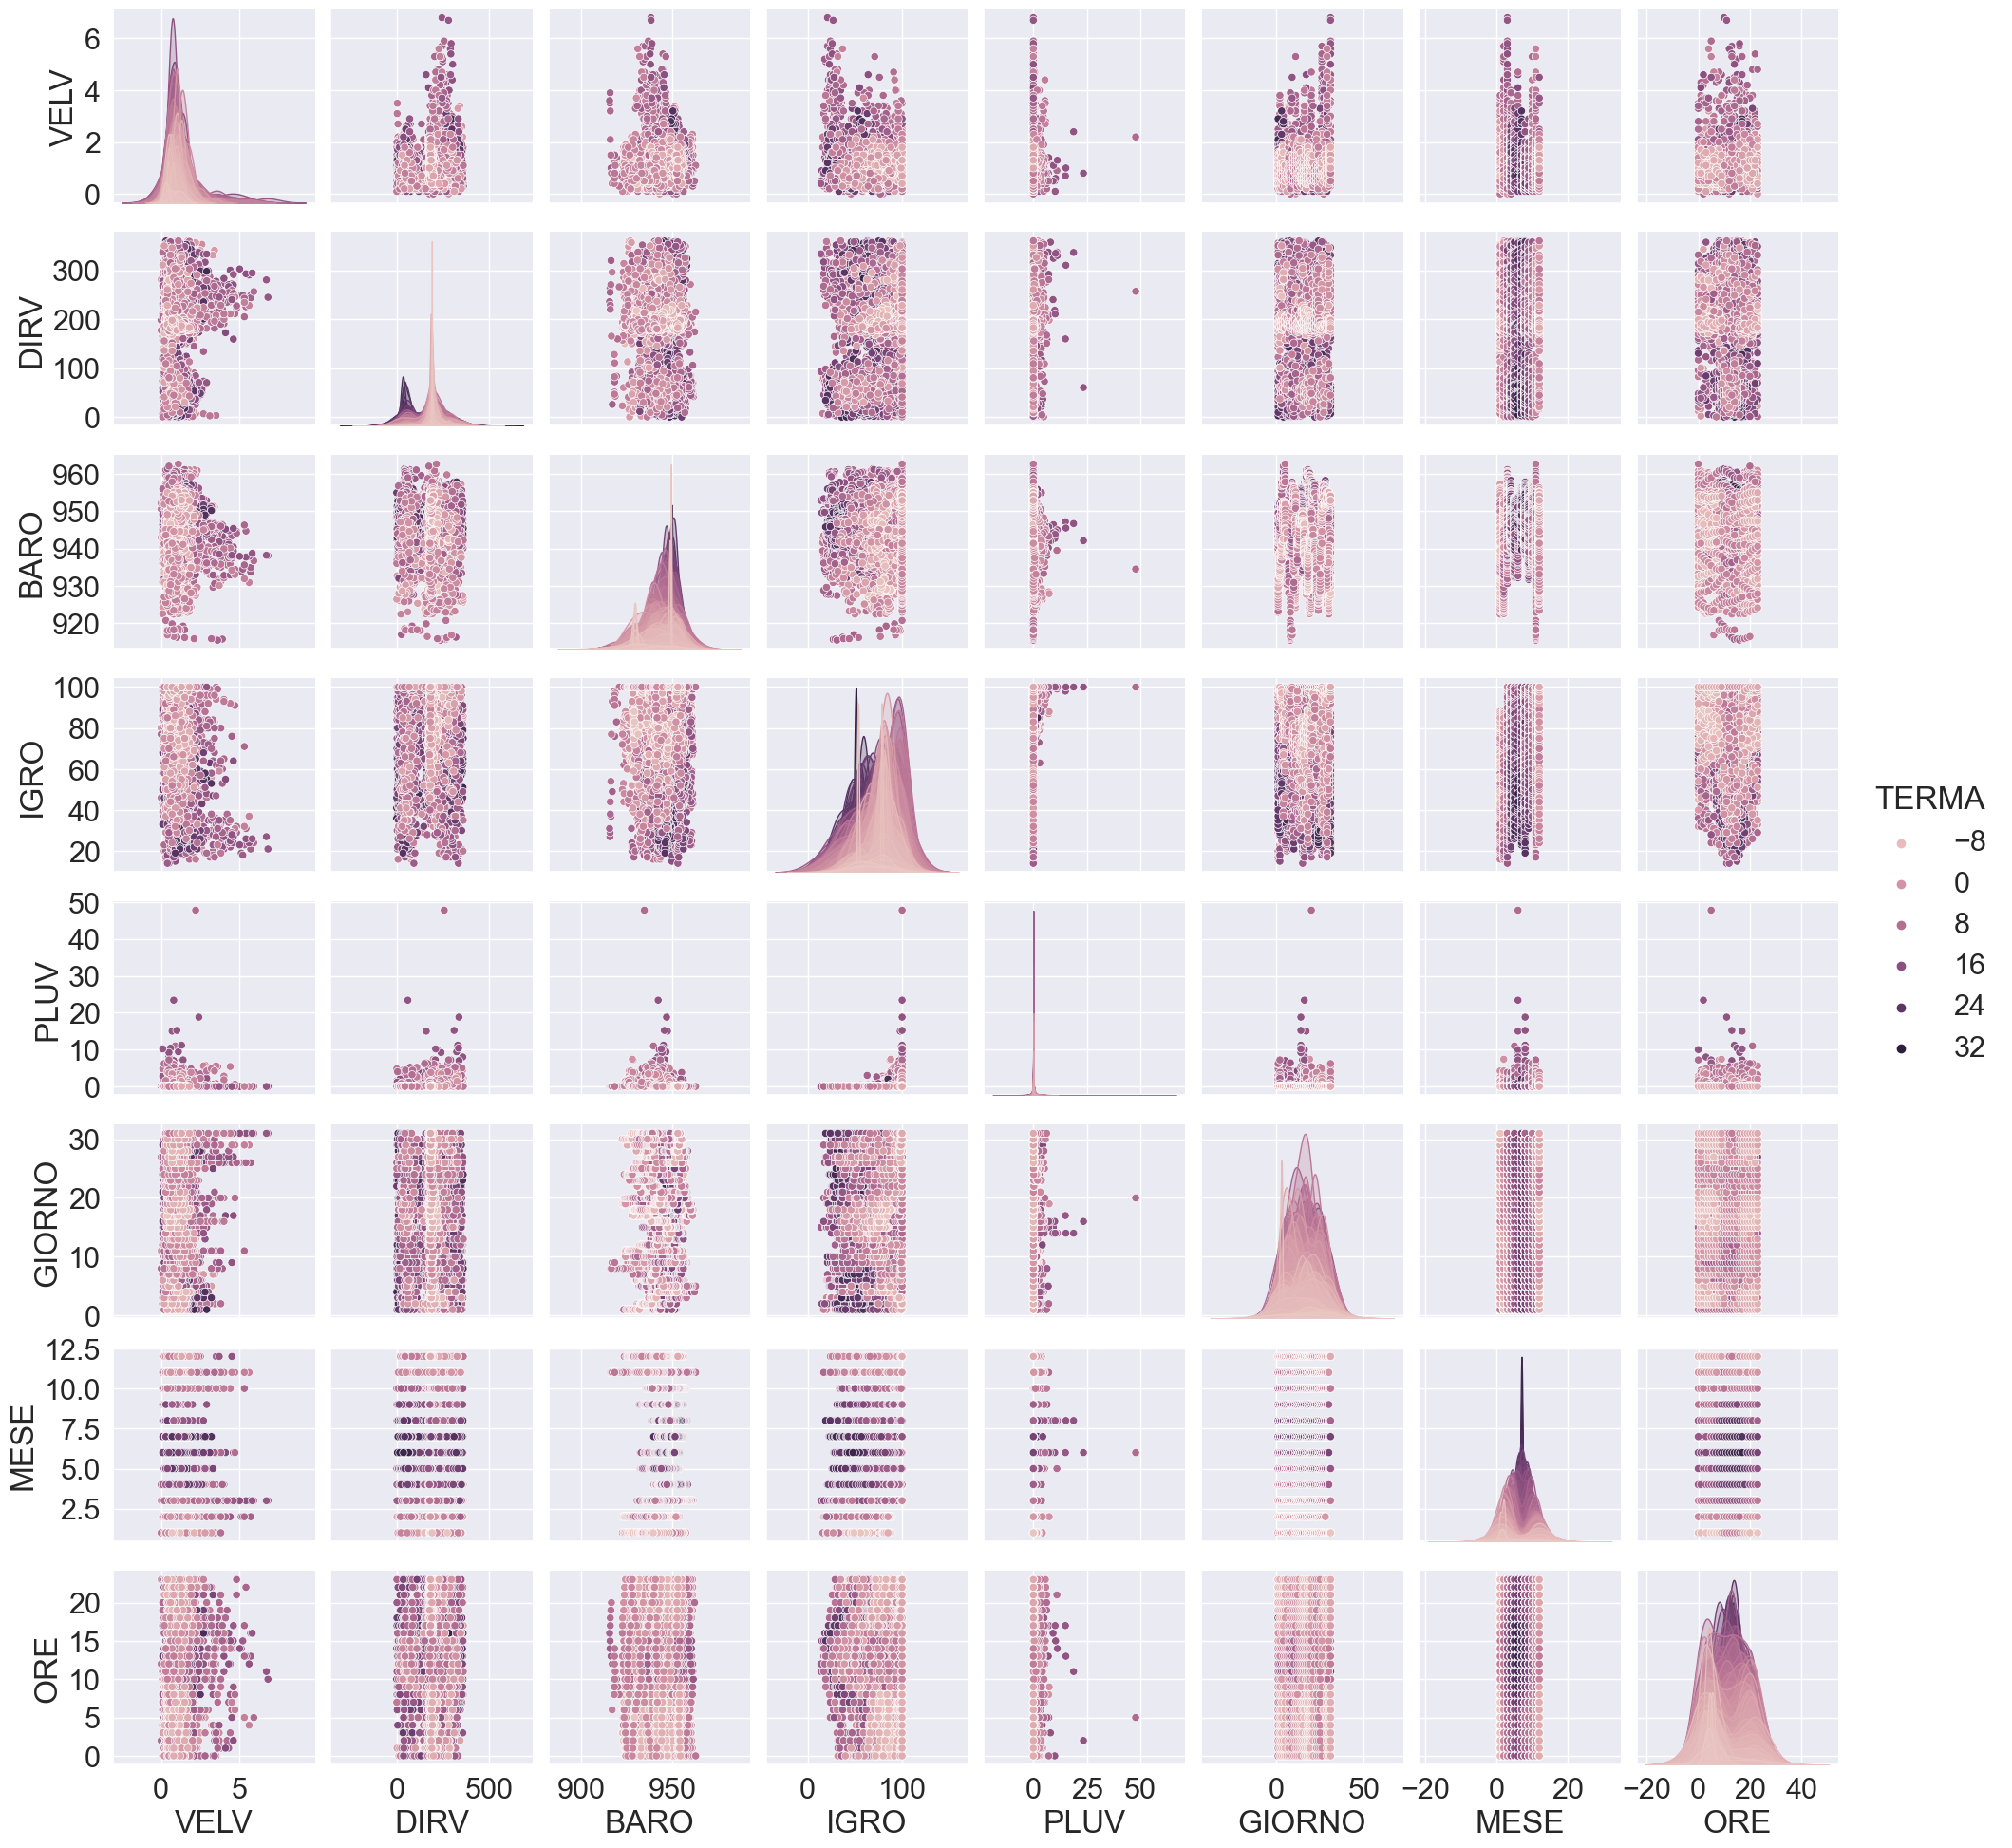

In [93]:
import seaborn as sns

sns.set_theme(font_scale=2)
sns.pairplot(dati1, hue="TERMA", dropna=True)
sns.set()

In [99]:
y=dati1["TERMA"].values
x=dati1[["VELV","DIRV","BARO","IGRO","PLUV","GIORNO","MESE","ORE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.27
coefficiente angolare -0.49
intercetta: -320.53



In [100]:
y=dati1["TERMA"].values
x=dati1[["BARO","IGRO","PLUV","MESE","ORE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.22
coefficiente angolare 0.38
intercetta: -343.95



In [101]:
y=dati1["TERMA"].values
x=dati1[["VELV","DIRV","BARO","IGRO","MESE","ORE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.27
coefficiente angolare -0.40
intercetta: -315.96



In [102]:
y=dati1["TERMA"].values
x=dati1[["DIRV","MESE","ORE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.16
coefficiente angolare -0.04
intercetta: 13.02



In [103]:
y=dati1["TERMA"].values
x=dati1[["MESE","ORE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.04
coefficiente angolare 0.42
intercetta: 5.91



In [104]:
y=dati1["TERMA"].values
x=dati1[["DIRV","BARO","MESE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.22
coefficiente angolare -0.04
intercetta: -330.82



In [105]:
y=dati1["TERMA"].values
x=dati1[["VELV","DIRV","BARO","IGRO","PLUV","MESE","ORE"]].values
reg = LinearRegression().fit(x,y)

print(f"""
coefficiente di determinazione R^2 {reg.score(x,y):.2f}
coefficiente angolare {reg.coef_[0]:.2f}
intercetta: {reg.intercept_:.2f}
""")


coefficiente di determinazione R^2 0.27
coefficiente angolare -0.46
intercetta: -320.30

